In [2]:
import os
import cv2
import matplotlib.pyplot as plt
from vision.tools.camera import stretch_img
import numpy as np


In [3]:
def plot_img(img, cmap=None):
    f, ax = plt.subplots(1, 1, figsize = (15, 10))
    if cmap is None:
        ax.imshow(img)
    else:
        ax.imshow(img, cmap)   

In [12]:
#rgb = cv2.demosaicing(frame[:, :, 0], cv2.COLOR_BAYER_BG2BGR)
frame = cv2.imread("/home/fruitspec-lab/FruitSpec/Sandbox/data_31112022/test/frame_255.jpg")
rgb = cv2.cvtColor(frame[:, :, 0], cv2.COLOR_BAYER_BG2BGR)
for i in range(3):
    frame[:,:,i] = cv2.equalizeHist(frame[:, :, i])
    cv2.normalize(frame[:, :, i], frame[:, :, i], 0, 255, cv2.NORM_MINMAX)
plot_img(frame)
# channel_1 = frame[:, :, 1].copy()
# img = channel_1.copy()
# channel_2 = frame[:, :, 2].copy()
# rgb.shape

error: OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'normalize'
> Overload resolution failed:
>  - Layout of the output array dst is incompatible with cv::Mat
>  - Expected Ptr<cv::UMat> for argument 'dst'


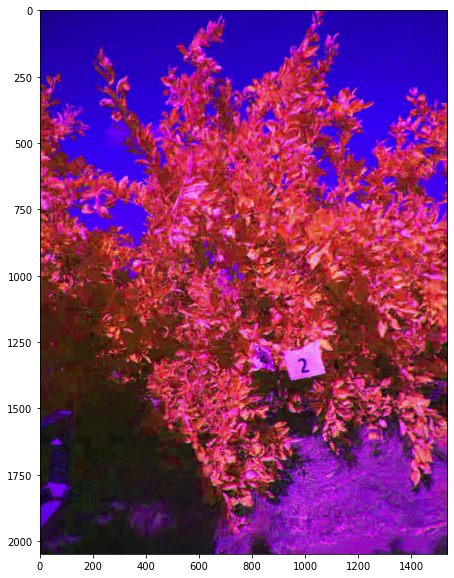

In [10]:
channel_1_st = stretch_img(channel_1, 255, 0)
fsi = rgb.copy()
fsi[:, :, 1] = channel_1_st.copy()
fsi[:, :, 0] = channel_2.copy()
plot_img(fsi)

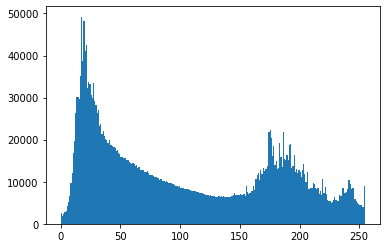

In [16]:
_ = plt.hist(rgb[:,:,1].flatten(), 255)

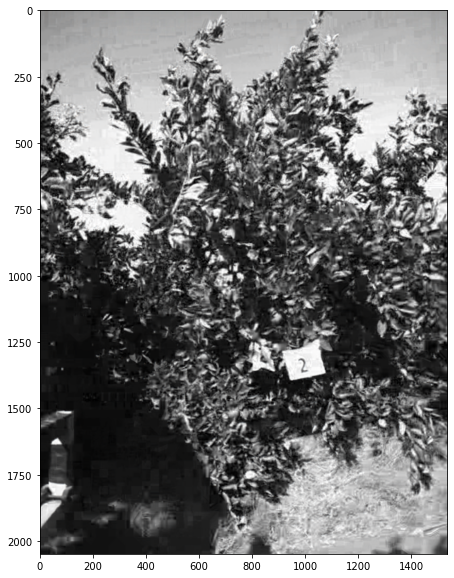

In [21]:
plot_img(rgb)

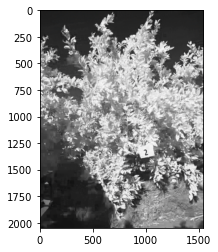

In [8]:
plt.imshow(rgb)

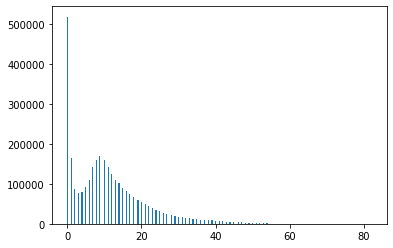

In [22]:
_ = plt.hist(channel_1.flatten(), 255)

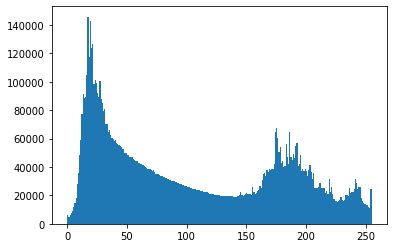

In [27]:
_ = plt.hist(rgb.flatten(), 255)

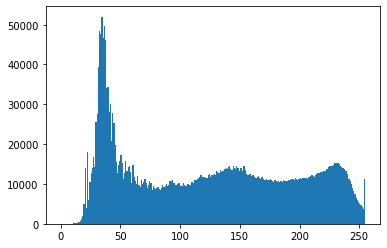

In [16]:
_ = plt.hist(channel_2.flatten(), 255)

In [55]:
normalized_img = (img.astype(np.float32) - img.min()) / (img.max() - img.min())
h, b = np.histogram(normalized_img.flatten(), 255)
total = np.sum(h)
accumulated = np.cumsum(h).astype(np.float32) / total

for i, h_ in enumerate(accumulated):
    if h_ >= 0.05:
        break
lower_threshold = b[i]

for i in range(len(accumulated) - 1, 0, -1):
    if accumulated[i] <= 0.95:
        break
upper_threshold = b[i]

In [56]:
upper_threshold

0.37254903

In [57]:
lower_threshold

0.0

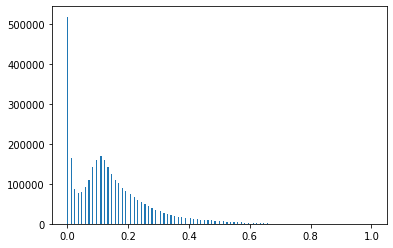

In [40]:
_ = plt.hist(normalized_img.flatten(), 255)

In [48]:
s_img = stretch_img(normalized_img, (235 / upper_threshold), 10)
s_img[s_img > 255] = 255

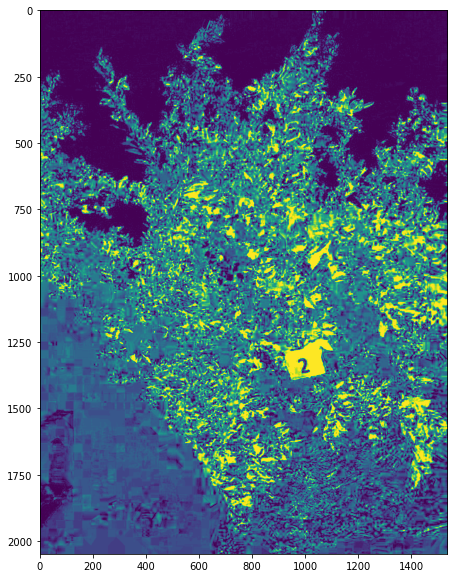

In [49]:
plot_img(s_img)

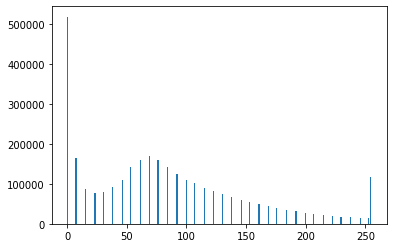

In [50]:
_ = plt.hist(s_img.flatten(),256)

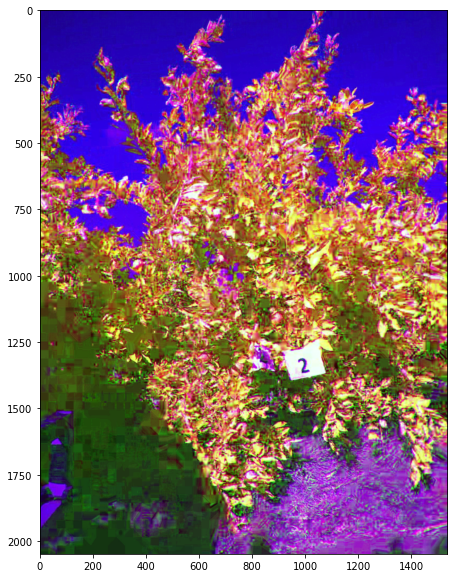

In [54]:
fsi[:, :, 1] = s_img.copy()
plot_img(fsi)

In [58]:
img = channel_2.copy()
normalized_img = (img.astype(np.float32) - img.min()) / (img.max() - img.min())
h, b = np.histogram(normalized_img.flatten(), 255)
total = np.sum(h)
accumulated = np.cumsum(h).astype(np.float32) / total

for i, h_ in enumerate(accumulated):
    if h_ >= 0.05:
        break
lower_threshold = b[i]

for i in range(len(accumulated) - 1, 0, -1):
    if accumulated[i] <= 0.95:
        break
upper_threshold = b[i]

In [59]:
upper_threshold

0.92156863

In [60]:
r_img = stretch_img(normalized_img, (235 / upper_threshold), 10)
r_img[r_img > 255] = 255

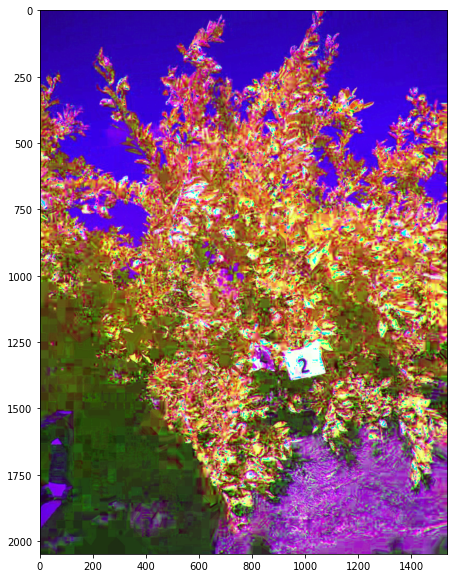

In [61]:
fsi[:, :, 0] = r_img.copy()
plot_img(fsi)